# What are the most demanded skills for the top 3 most popular data roles?

### Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Claculate skill percentage
4. Plot final findings

In [1]:
# Importing Libraries
import pandas as pd 
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_Mex = df[df['job_country'] == 'Mexico']


In [13]:
df_skills = df_Mex.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
1,Data Analyst,power bi
...,...,...
785700,Data Engineer Ssr/Sr,aws
785700,Data Engineer Ssr/Sr,gcp
785700,Data Engineer Ssr/Sr,spark
785700,Data Engineer Ssr/Sr,kafka


In [15]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1153,sql,Data Engineer,2953
896,python,Data Engineer,2698
897,python,Data Scientist,1745
1154,sql,Data Scientist,1606
85,aws,Data Engineer,1433
...,...,...,...
809,phoenix,Software Engineer,1
811,php,Cloud Engineer,1
815,php,Machine Learning Engineer,1
816,php,Senior Data Analyst,1


In [19]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

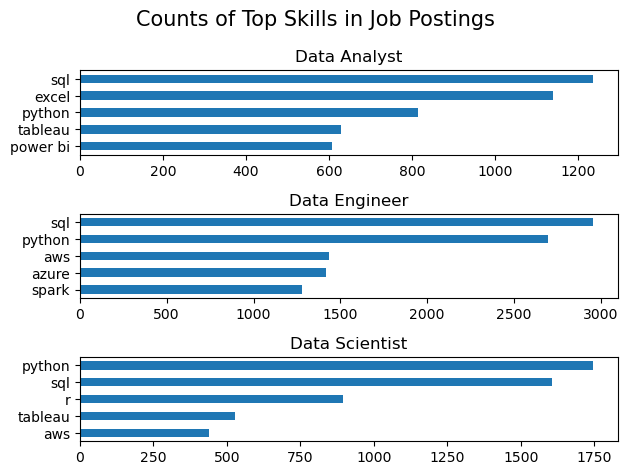

In [30]:
fig, ax =plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
# Data frame that counts the total amount of jobs associated with the job title
df_job_title_count = df_Mex['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,4333
1,Data Analyst,2807
2,Data Scientist,2800
3,Software Engineer,1430
4,Business Analyst,1358
5,Senior Data Engineer,843
6,Senior Data Scientist,494
7,Machine Learning Engineer,381
8,Cloud Engineer,367
9,Senior Data Analyst,326


In [38]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,2953,4333,68.151396
1,python,Data Engineer,2698,4333,62.266328
2,python,Data Scientist,1745,2800,62.321429
3,sql,Data Scientist,1606,2800,57.357143
4,aws,Data Engineer,1433,4333,33.071775
...,...,...,...,...,...
1393,phoenix,Software Engineer,1,1430,0.069930
1394,php,Cloud Engineer,1,367,0.272480
1395,php,Machine Learning Engineer,1,381,0.262467
1396,php,Senior Data Analyst,1,326,0.306748


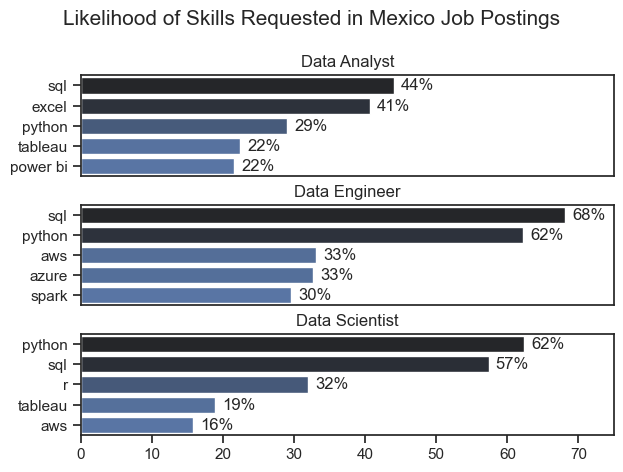

In [68]:
fig, ax =plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])    


fig.suptitle('Likelihood of Skills Requested in Mexico Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()